In [13]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
import cmocean.cm as cmo
#plt.rcParams['figure.facecolor'] = 'white'
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}
import postmit as pm
from matplotlib.patches import Rectangle

In [14]:
def no_axes(ax):
    ax.spines.left.set_visible(False)
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.spines.bottom.set_visible(False)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.patch.set_alpha(0)

In [15]:
path = "../data_for_plots/" 

In [16]:
THETA = xr.open_mfdataset(path + "THETA_0201-01-01_0300-12-30_zonal_mean.nc")
SALT = xr.open_mfdataset(path + "SALT_0201-01-01_0300-12-30_zonal_mean.nc")
UVEL = xr.open_mfdataset(path + "UVEL_0201-01-01_0300-12-30_zonal_mean.nc")
SIarea = xr.open_mfdataset(path + "SIarea_0201-01-01_0300-12-30_JJA_zonal_mean.nc")
SIheff = xr.open_mfdataset(path + "SIheff_0201-01-01_0300-12-30_JJA_zonal_mean.nc")

In [17]:
WOA_t_an = xr.open_mfdataset(path + "WOA18_t_an.nc")
WOA_s_an = xr.open_mfdataset(path + "WOA18_s_an.nc")

In [18]:
SLTAC_ugos = xr.open_mfdataset(path + "SLTAC_ugos.nc")

In [19]:
NSIDC_siconc = xr.open_mfdataset(path + "NSIDC_siconc_interp_lat.nc")

In [20]:
ERA5_zonal_wind = xr.open_mfdataset(path + "ERA5_zonal_wind.nc")

In [21]:
UVEL_upper_ocean = (UVEL.UVEL.sel(Z=slice(0, -1000)) * UVEL.drF).sum("Z") / (UVEL.drF.sel(Z=slice(0, -1000)).sum("Z"))

In [22]:
SIedge15 = SIarea.YC.isel(YC=np.argmax(SIarea.SIarea.values[10::] < 0.15) + 10).values
SIedge80 = SIarea.YC.isel(YC=np.argmax(SIarea.SIarea.values[10::] < 0.80) + 10).values

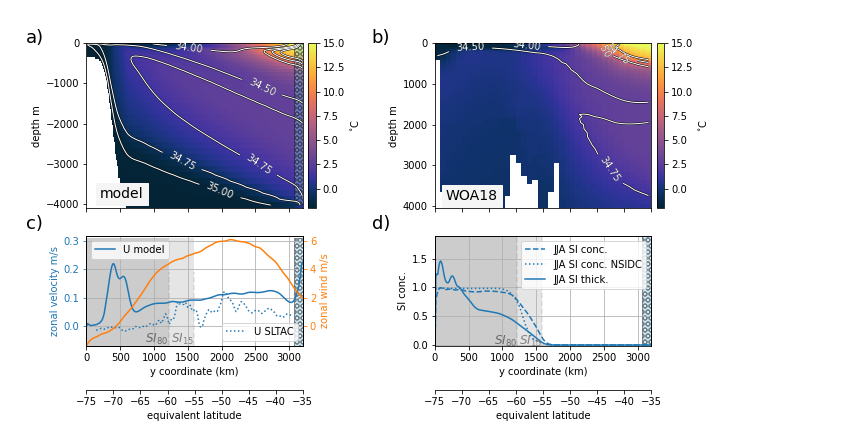

In [23]:
fig, ax = plt.subplots(2, 6, figsize=(12, 6), gridspec_kw={'height_ratios': [6, 4], 'width_ratios': [30, 1, 15, 30, 1, 15]})

c1 = ax[0, 0].pcolormesh(THETA.YC, THETA.Z, THETA.THETA.where(THETA.THETA != 0), vmin=-2, vmax=15, cmap=cmo.thermal)
cs1 = SALT.where(SALT.SALT != 0).SALT.plot.contour(ax=ax[0, 0], levels=[34, 34.5, 34.75, 35], colors="k", linewidths=2)
cs2 = SALT.where(SALT.SALT != 0).SALT.plot.contour(ax=ax[0, 0], levels=[34, 34.5, 34.75, 35], colors="w", linewidths=1)
ax[0, 0].clabel(cs1, cs1.levels, inline=True, fontsize=10)
ax[0, 0].clabel(cs2, cs2.levels, inline=True, fontsize=10)
ax[0, 0].add_patch(Rectangle((3.07e6, -4000), 0.13e6, 4000, alpha=0.4, facecolor="skyblue", hatch="OO", edgecolor="k"))
ax[0, 0].set_xticks(np.arange(0, 3.2e6, 0.5e6))
ax[0, 0].set_xticklabels([])
ax[0, 0].set_xlabel("")
ax[0, 0].set_ylabel("depth m")
ax[0, 0].text(2e5, -3850, "model", fontsize=14, bbox=dict(facecolor="whitesmoke", edgecolor="whitesmoke", alpha=1))
plt.colorbar(c1, cax=ax[0, 1])
ax[0, 1].set_ylabel(r"$^{\circ}$C")

c2 = ax[0, 3].pcolormesh(WOA_t_an.lat, WOA_t_an.depth, WOA_t_an.t_an, vmin=-2, vmax=15, cmap=cmo.thermal)
cs3 = WOA_s_an.s_an.plot.contour(ax=ax[0, 3], yincrease=False, levels=[34, 34.5, 34.75, 35], colors="k", linewidths=2)
cs4 = WOA_s_an.s_an.plot.contour(ax=ax[0, 3], yincrease=False, levels=[34, 34.5, 34.75, 35], colors="w", linewidths=1)
ax[0, 0].clabel(cs3, cs3.levels, inline=True, fontsize=10)
ax[0, 0].clabel(cs4, cs4.levels, inline=True, fontsize=10)
ax[0, 3].set_xticks(np.linspace(-75, -35, 9))
ax[0, 3].set_xticklabels([])
ax[0, 3].set_xlabel("")
ax[0, 3].set_ylabel("depth m")
ax[0, 3].set_title("")
ax[0, 3].text(-73, 3850, "WOA18", fontsize=14, bbox=dict(facecolor="whitesmoke", edgecolor="whitesmoke", alpha=1))
plt.colorbar(c2, cax=ax[0, 4])
ax[0, 4].set_ylabel(r"$^{\circ}$C")

ax[1, 0].plot(UVEL.YC, UVEL_upper_ocean, color="tab:blue", label="U model")
ax_obs = ax[1, 0].twiny()
ax_obs.plot(SLTAC_ugos.latitude, SLTAC_ugos.ugos, color="tab:blue", linestyle=":", label="U SLTAC")
ax_obs.spines.top.set_visible(False)
ax_obs.set_xticks([])
ax_obs.legend(loc=4)
ax[1, 0].legend(loc=2)
ax[1, 0].grid()
ax[1, 0].set_ylabel("zonal velocity m/s", color="tab:blue")
ax[1, 0].set_xticks(np.arange(0, 3.2e6, 0.5e6))
ax[1, 0].set_xticklabels(np.arange(0, 3200, 500))
ax[1, 0].set_xlabel("y coordinate (km)")
ax[1, 0].set_xlim(0, 3.2e6)
ax[1, 0].set_ylim(-0.07, 0.32)
ax[1, 0].vlines(SIedge15, -0.07, 0.19,  colors='gray', linestyle='--', alpha=0.2)
ax[1, 0].add_patch(Rectangle((0, -0.07), SIedge15, 0.38, alpha=0.2, facecolor="gray", edgecolor=None))
ax[1, 0].text(SIedge15, -0.06, r"$SI_{15} $", ha="right", fontsize=12, color="gray")
ax[1, 0].vlines(SIedge80, -0.07, 0.19,  colors='dimgray', linestyle='--', alpha=0.2)
ax[1, 0].add_patch(Rectangle((0, -0.07), SIedge80, 0.38, alpha=0.2, facecolor="dimgray", edgecolor=None))
ax[1, 0].text(SIedge80, -0.06, r"$SI_{80} $", ha="right", fontsize=12, color="dimgray")
ax[1, 0].add_patch(Rectangle((3.07e6, -0.07), 0.13e6, 0.38, alpha=0.4, facecolor="skyblue", hatch="OO", edgecolor="k"))
ax[1, 0].tick_params(axis="y", colors="tab:blue")

ax[1, 3].plot(SIarea.YC, SIarea.SIarea, label="JJA SI conc.", color="tab:blue", ls="--")
ax[1, 3].plot(SIarea.YC, NSIDC_siconc.siconc, label="JJA SI conc. NSIDC", color="tab:blue", ls=":")
ax[1, 3].plot(SIheff.YC, SIheff.SIheff, label="JJA SI thick.", color="tab:blue", ls="-")
ax[1, 3].legend(loc=1)
ax[1, 3].grid()
ax[1, 3].set_ylabel("SI conc.")
ax[1, 3].set_xticks(np.arange(0, 3.2e6, 0.5e6))
ax[1, 3].set_xticklabels(np.arange(0, 3200, 500))
ax[1, 3].set_xlabel("y coordinate (km)")
ax[1, 3].set_xlim(0, 3.2e6)
ax[1, 3].set_ylim(-0.01, 1.9)
ax[1, 3].vlines(SIedge15, -0.01, 1.9,  colors='gray', linestyle='--', alpha=0.2)
ax[1, 3].add_patch(Rectangle((0, -0.01), SIedge15, 1.9, alpha=0.2, facecolor="gray", edgecolor=None))
ax[1, 3].text(SIedge15, 0, r"$SI_{15} $", ha="right", fontsize=12, color="gray")
ax[1, 3].vlines(SIedge80, -0.01, 1.9,  colors='dimgray', linestyle='--', alpha=0.2)
ax[1, 3].add_patch(Rectangle((0, -0.01), SIedge80, 1.9, alpha=0.2, facecolor="dimgray", edgecolor=None))
ax[1, 3].text(SIedge80, 0, r"$SI_{80} $", ha="right", fontsize=12, color="dimgray")
ax[1, 3].add_patch(Rectangle((3.07e6, -0.01), 0.13e6, 1.9, alpha=0.4, facecolor="skyblue", hatch="OO", edgecolor="k"))

adax1 = ax[1, 0].twiny()
adax1.spines.bottom.set_position(("axes", -0.4))
adax1.set_xlim(-75, -35)
adax1.set_xticks(np.linspace(-75, -35, 9))
adax1.xaxis.tick_bottom()
adax1.xaxis.set_label_position("bottom")
adax1.set_xlabel("equivalent latitude")

windax = ax[1, 0].twinx()
windax.plot(THETA.YC, ERA5_zonal_wind.zonal_wind, color="tab:orange", label="zonal\nwind")
windax.set_ylim(-1.4, 6.4)
#windax.legend(loc=1, bbox_to_anchor=[1.1, 1.25])
windax.set_ylabel("zonal wind m/s", color="tab:orange")
windax.tick_params(axis='y', colors='tab:orange')

adax2 = ax[1, 3].twiny()
adax2.spines.bottom.set_position(("axes", -0.4))
adax2.set_xlim(-75, -35)
adax2.set_xticks(np.linspace(-75, -35, 9))
adax2.xaxis.tick_bottom()
adax2.xaxis.set_label_position("bottom")
adax2.set_xlabel("equivalent latitude")

for axx in [ax[0, 2], ax[0, 5], ax[1, 1], ax[1, 2], ax[1, 4], ax[1, 5]]:
    no_axes(axx)
    
fig.text(0.03, 0.9, "a)", fontsize=18)
fig.text(0.43, 0.9, "b)", fontsize=18)
fig.text(0.03, 0.47, "c)", fontsize=18)
fig.text(0.43, 0.47, "d)", fontsize=18)

plt.subplots_adjust(wspace=0.05, hspace=0.2, bottom=0.2, top=0.9, left=0.1, right=0.9)

plt.savefig("fig02-evaluation.png", dpi=300)